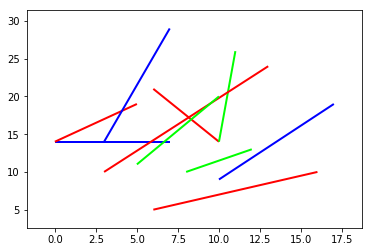

In [257]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
import random
N = 10
lines = []
for i in range(N):
    left_top = (random.randint(0, 10), random.randint(5, 15))
    right_bottom = (random.randint(5,20), random.randint(10, 30))
    lines.append([(left_top), (right_bottom)])
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)


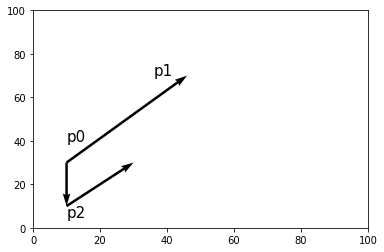

In [258]:
import matplotlib.pyplot as plt
plt.quiver([10], [10], [20], [20], angles='xy', scale_units='xy', scale=1)
plt.quiver([10], [30], [36], [40], angles='xy', scale_units='xy', scale=1)
plt.quiver([10], [30], [0], [-20], angles='xy', scale_units='xy', scale=1)
s='p0'
plt.text(10, 40, s, fontsize=15)
s = 'p1'
plt.text(36, 70, s, fontsize=15)
s = 'p2'
plt.text(10, 5, s, fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [259]:
def  cross_product(l1, l2):
    p1 = l1[0]
    p2 = l1[1]
    x1 = p2[0] - p1[0]
    y1 = p2[1] - p1[1]
    p3 = l2[0]
    p4 = l2[1]
    x2 = p4[0] - p3[0]
    y2 = p4[1] - p3[1]
    return x1*y2 - x2*y1  #公式(1)
#p0p1向量为[(10, 30), (46, 70)],p0p2为[(10, 30), (10, 10)]
r = cross_product([(10, 30), (46, 70)], [(10, 30), (10, 10)])
print("corss product is ", r)

corss product is  -720


In [260]:
class  point:
    def  __init__(self, point, is_left):
        self.x = point[0]
        self.y = point[1]
        self.is_left = is_left #是否是线段的左端点
    def  get_x(self):
        return  self.x
    def  get_y(self):
        return  self.y
    def  is_left_point(self):
        return  self.is_left
    def  set_segment(self, segment):
        self.segment = segment
    def  get_segment(self):
        return  self.segment  #返回改点对应的线段
    def  __str__(self):
        return "x: {0}, y: {1}".format(self.x, self.y)
class  segment:
    def  __init__(self, points):
        self.left_point = point(points[0], True)
        self.right_point = point(points[1], False)
        self.left_point.set_segment(self)
        self.right_point.set_segment(self)
    def  get_left_point(self):
        return  self.left_point
    def  get_right_point(self):
        return  self.right_point
    def  get_interset_point(self, x):  #给定扫描线x坐标返回它与扫描线交点
        m = (self.right_point.get_y() - self.left_point.get_y()) / (self.right_point.get_x() - self.left_point.get_x())  #计算斜率
        y = m * (x - self.left_point.get_x()) + self.left_point.get_y()
        return  point((x, y), False)
    def  get_tree_node(self):
        return  self.tree_node
    def  set_tree_node(self, tree_node):
        self.tree_node = tree_node
    def  __str__(self):
        return "left node is: {0}, right node is: {1}".format(str(self.get_left_point()), str(self.get_right_point()))

In [261]:
s1 = segment([(10, 30), (46, 70)])
s2 = segment([(10, 10), (30, 30)])
scan_line_x = 10
p0 = s1.get_interset_point(scan_line_x)
p2 = s2.get_interset_point(scan_line_x)
print("p0: ", p0)
print("p2: ", p2)

p0:  x: 10, y: 30.0
p2:  x: 10, y: 10.0


In [262]:
def  compare_segments_by_scanline(s1, s2, x):
    if s1.get_left_point().get_x() > x or s1.get_right_point().get_x() < x:
        raise Exception("scan line not interset s1")
    if s2.get_left_point().get_x() > x or s2.get_right_point().get_x() < x:
        raise Exception("scan line not interset s2")
    l1 = [(s1.get_left_point().get_x(), s1.get_left_point().get_y()), (s1.get_right_point().get_x(), s1.get_right_point().get_y())]
    p0 = s1.get_interset_point(x)  
    p2 = s2.get_interset_point(x)
    l2 = [(p0.get_x(), p0.get_y()), (p2.get_x(), p2.get_y())]
    cp = cross_product(l1, l2)
    if cp < 0:
        return 1
    if cp > 0:
        return -1
    return 0
c = compare_segments_by_scanline(s1, s2, 10)  #在扫描线位于x=10时比较两条线段大小
if c == 1:
    print("s1 bigger than s2")
if c == -1:
    print("s1 smaller than s2")

s1 bigger than s2


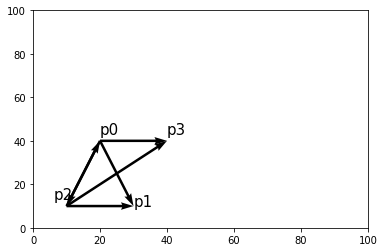

In [263]:
import matplotlib.pyplot as plt
plt.quiver([10], [10], [30], [30], angles='xy', scale_units='xy', scale=1)
plt.quiver([20], [40], [10], [-30], angles='xy', scale_units='xy', scale=1)
plt.quiver([20], [40], [-10], [-30], angles = 'xy', scale_units = 'xy', scale = 1)
plt.quiver([20], [40], [20], [0], angles = 'xy', scale_units = 'xy', scale = 1)
plt.quiver([10], [10], [20], [0], angles = 'xy', scale_units = 'xy', scale = 1)
plt.quiver([10], [10], [10], [30], angles = 'xy', scale_units = 'xy', scale = 1)
s='p0'
plt.text(20, 43, s, fontsize=15)
s = 'p1'
plt.text(30, 10, s, fontsize=15)
s='p2'
plt.text(6, 13, s, fontsize=15)
s = 'p3'
plt.text(40, 43, s, fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [264]:
def  on_segment(line, point):
    left = line[0]
    right = line[1]
    if min(left[0], right[0]) <= point.get_x() and point.get_x() <= max(left[1], right[1]):
        if min(left[1] , right[1]) <= point.get_y() and point.get_y() <= max(left[1], right[1]):
            return  True
    return False
def  segment_interset(l1, l2):
    p0 = l1.get_left_point()
    p1 = l1.get_right_point()
    p2 = l2.get_left_point()
    p3 = l2.get_right_point()
    l_p0_p2 = [(p0.get_x(), p0.get_y()), (p2.get_x(), p2.get_y())]
    l_p0_p3 = [(p0.get_x(), p0.get_y()), (p3.get_x(), p3.get_y())]
    l_p0_p1 = [(p0.get_x(), p0.get_y()), (p1.get_x(), p1.get_y())]
    d1 = cross_product(l_p0_p2, l_p0_p1)
    d2 = cross_product(l_p0_p3, l_p0_p1)
    l_p2_p0 = [(p2.get_x(), p2.get_y()), (p0.get_x(), p0.get_y())]
    l_p2_p3 = [(p2.get_x(), p2.get_y()), (p3.get_x(), p3.get_y())]
    l_p2_p1 = [(p2.get_x(), p2.get_y()), (p1.get_x(), p1.get_y())]
    d3 = cross_product(l_p2_p0, l_p2_p3)
    d4 = cross_product(l_p2_p1, l_p2_p3)
    if d1 * d2 < 0 and d3 * d4 < 0:
        return  True
    if d1 == 0 and on_segment(l_p0_p1, p2):  #p2在p0p1上
        return  True
    if d2 == 0 and on_segment(l_p0_p1, p3):  #p3在p0p1上
        return  True
    if d3 == 0 and on_segment(l_p2_p3, p0): #p0在p2p3上
        return  True
    if d4 == 0 and on_segment(l_p2_p3, p1):  #p1在p2p3上
        return  True
    return False
l1 = segment([(10, 10), (40, 40)])  #两线相交     
l2 = segment([(20, 40), (30, 10)])
interset = segment_interset(l1, l2)
print("l1 , l2 interset and segment_interset returns: ", interset)
l1 = segment([(10, 10), (40, 40)])  #p3在l1上
l2 = segment([(25, 30), (40, 40)])
interset = segment_interset(l1, l2)
print("p3 on line l1 and segment_interset returns: ", interset)
l1 = segment([(10, 10), (40, 40)])  #两线段不相交
l2 = segment([(50, 50), (80, 80)])
interset = segment_interset(l1, l2)
print("l1 and l2 not interset  and segment_interset returns: ", interset)

l1 , l2 interset and segment_interset returns:  True
p3 on line l1 and segment_interset returns:  True
l1 and l2 not interset  and segment_interset returns:  False


In [265]:
class  tree_node:
    def  __init__(self, segment):
        self.segment = segment
        segment.set_tree_node(self)  #将线段与节点联系起来
        self.parent = None
        self.left = None
        self.right = None
    def  get_segment(self):
        return  self.segment
    def  get_parent(self):
        return  self.parent
    def  get_left(self):
        return  self.left
    def  get_right(self):
        return  self.right
class  segment_tree:
    def  __init__(self):
        self.root = None
    def  insert(self, point):
        if self.root == None:
            self.root = tree_node(point.get_segment())
        else:
            insert_segment = point.get_segment()
            node_segment = self.root.get_segment()
            x = point.get_x()  #插入点对应x坐标就是扫描点
            current_node = self.root
            prev_node = current_node
            while current_node != None:
                node_segment = current_node.get_segment()
                compare = compare_segments_by_scanline(node_segment, insert_segment, x)
                prev_node = current_node
                if compare > 0: #如果插入点对应的线段小于当前节点线段则进入左孩子
                    current_node = current_node.get_left()
                else:  #插入点对应现代大于当前点对应线段则进入右孩子
                    current_node = current_node.get_right()
            node_segment = prev_node.get_segment()
            compare = compare_segments_by_scanline(insert_segment, node_segment, x)
            node = tree_node(insert_segment)
            if compare <= 0:
                prev_node.left = node 
                insert_segment.set_tree_node(node)
            else:
                prev_node.right = node
                insert_segment.set_tree_node(node)
            node.parent = prev_node
    def  delete(self, point):  #删除指定端点对应的线段
        node = point.get_segment().get_tree_node()
        if node is None:
            return
        if node.left is None: #如果它没有左孩子节点,那么直接用它的右孩子替代
            self.replace_node(node, node.right)
        else: 
            next_node = node.left
            while next_node.right != None:
                next_node = next_node.right
            self.replace_node(node, next_node)
    def  replace_node(self, node_deleted, node_replace):
        parent = node_deleted.parent 
        is_left = True
        if parent and parent.right == node_deleted:
            is_left = False
        if  parent is None:
                self.root = node_replace
        else:
            if  is_left:
                parent.left = node_replace
            else:
                parent.right = node_replace
            if  node_replace.get_left() != None:
                node_replace.get_parent().right = node_replace.get_left()
            node_replace.left = node_deleted.get_left()
            node_replace.right = node_deleted.get_right()
            node_replace.parent = parent
    def  above(self, point):
        node = point.get_segment().get_tree_node()
        if node is None:
            return
        if node.get_right() != None:
            node = node.get_right()
            while node.get_left() != None:
                node = node.get_left()
            return node.get_segment()
        else:  #如果没有右孩子,那必须沿着父节点回溯直到某个节点时其父节点的左孩子，那么父节点就是所要找节点
            parent = node.parent
            if parent is None:
                return None 
            while parent and parent.get_left() != node:
                node = node.parent
                parent = node.parent
            if parent is None:
                return None
            return  parent.get_segment()
    def  below(self, point):
        node = point.get_segment().get_tree_node()
        if  node is None:
            return
        if  node.left is not None:
            node = node.left
            while node.right != None:
                node = node.right
            return node.get_segment()
        else:  #没有左孩子那就得沿着父节点回溯
            parent = node.parent
            while parent  and parent.right != node:
                node = node.parent
                parent = node.parent
            if  parent is None:
                return  None
            return  parent.get_segment()

In [266]:
S = []
T = segment_tree()
s = segment([(5, 11), (15, 11)])
S.append(s)
node11 = s
point11 = s.get_left_point()
T.insert(s.get_left_point())
s = segment([(5, 5), (15, 5)])
S.append(s)
T.insert(s.get_left_point())      
s = segment([(5, 16), (15, 16)])
S.append(s)
T.insert(s.get_left_point())         
s = segment([(5, 3), (15, 3)])
S.append(s)
T.insert(s.get_left_point())
point3 = s.get_left_point()
s = segment([(5, 7), (15, 7)])
S.append(s)
T.insert(s.get_left_point())
point7 = s.get_left_point()
s = segment([(5, 1), (15, 1)])
S.append(s)
T.insert(s.get_left_point())
s = segment([(5, 4), (15, 4)])
S.append(s)
T.insert(s.get_left_point())
s = segment([(5, 6), (15, 6)])
S.append(s)
T.insert(s.get_left_point())
point6 = s.get_left_point()
s = segment([(5, 9), (15, 9)])
S.append(s)
T.insert(s.get_left_point())
s = segment([(5, 2), (15, 2)])
S.append(s)
T.insert(s.get_left_point())  
point2 = s.get_left_point()  
s = segment([(5, 8), (15, 8)])
S.append(s)
T.insert(s.get_left_point())
s = segment([(5, 10), (15, 10)])
S.append(s)
T.insert(s.get_left_point())
point10 = s.get_left_point()
node = node11.get_tree_node()
if  node.parent is None:
    left = node.get_left()
    right = node.get_right()
    if left.get_segment().get_left_point().get_y() == 5 and right.get_segment().get_right_point().get_y() == 16:
        print("tree build up is right")
s = T.above(point10)  #节点没有右孩子因此要沿着父节点回溯
if s.get_left_point().get_y() == 11:
    print("above point10 is correct")      
s = T.above(point7) #节点有右孩子因此要沿着右孩子找到最低左孩子
if s.get_left_point().get_y() == 8:
    print("above point7 is correct")
s = T.below(point11) #它有左孩子，沿着左孩子找到最底部的右孩子
if s.get_left_point().get_y() == 10:
    print("below point11 is correct")                    
s = T.below(point7)  #左孩子没有右孩子，返回左孩子
if s.get_left_point().get_y() == 6:
    print("below point7 is correct")                
s = T.below(point6) #没有左孩子沿着父节点回溯直到某个节点是其父节点的左孩子
if  s.get_left_point().get_y() == 5:
    print("below point6 is correct")  
T.delete(point3) #删除节点3，它有左孩子，从左孩子找到最底部的右孩子2来替代它
node = point2.get_segment().get_tree_node()
s_left = node.get_left().get_segment().get_left_point() 
s_right = node.get_right().get_segment().get_left_point()
s_p = node.get_parent().get_segment().get_left_point()
if  s_left.get_y() == 1 and s_right.get_y() == 4 and s_p.get_y() == 5:
    print("delete point3 correct")

tree build up is right
above point10 is correct
above point7 is correct
below point11 is correct
below point7 is correct
below point6 is correct
delete point3 correct


In [267]:
def compare(p1, p2):
    if  isinstance(p1, point) == False or isinstance(p2, point) == False:
        raise  Exception("not the sampe kind")
    if p1.get_x() < p2.get_x():
        return -1
    if p1.get_x() > p2.get_x():
            return 1
    if p1.get_x() == p2.get_x():
        if p1.is_left_point() == True and p2.is_left_point() == False:
                return -1
        elif p1.is_left_point() == False and p2.is_left_point() == True:
            return 1
        else:
            if  p1.get_y() <= p2.get_y():
                return -1
            else:
                return 1 
        return 0

In [268]:
def  has_segment_interset(S):
    if  len(S) <= 1:
        return  False
    segment_points = []
    for s in S:
        segment_points.append(s.get_left_point())
        segment_points.append(s.get_right_point())
    segment_points.sort(key=functools.cmp_to_key(compare))
    T = segment_tree()
    for  p in segment_points:
        if p.is_left_point() == True:  #如果是左节点就加入二叉树
            T.insert(p)
        above_segment = T.above(p)
        p_segment = p.get_segment()
        if  above_segment != None:  
            if  segment_interset(p_segment, above_segment) == True:
                return  (True, above_segment, p_segment)
        below_segment = T.below(p)
        if  below_segment  !=  None:
            if  segment_interset(p_segment, below_segment) == True:
                return  (True,  below_segment, p_segment)
        if  above_segment != None and  below_segment != None:
            if  segment_interset(abvoe_segment, below_segment):
                return  (True , above_segment, below_segment)
        if p.is_left_point() == False:  #如果是又端点，将它对应的线段从二叉树删除
            T.delete(p.get_segment().get_left_point())
    return  False

In [269]:
import functools 
#S中线段都是平行线不相交,我们加入一条线段[(6,8), (14, 12)]它与线段[(5, 9), (15, 9)]相交
S.append(segment([(6, 8), (14, 12)]))
(interset, s1, s2) = has_segment_interset(S)
if  interset == True:
    print("segment: ({0}) and segment: ({1})  interset.".format(str(s1), str(s2)))

segment: (left node is: x: 5, y: 9, right node is: x: 15, y: 9) and segment: (left node is: x: 6, y: 8, right node is: x: 14, y: 12)  interset.


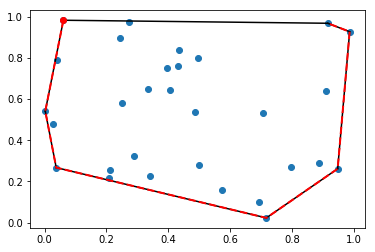

In [270]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
points = np.random.rand(30, 2) #随机生成30个二维点
hull = ConvexHull(points)  #计算其最小突壳
plt.plot(points[:,0], points[:,1], 'o')  #将点绘制出来
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)  #将突壳绘制出来
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

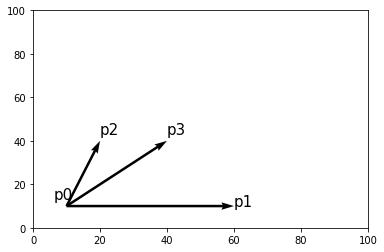

In [271]:
import matplotlib.pyplot as plt
plt.quiver([10], [10], [30], [30], angles='xy', scale_units='xy', scale=1)
plt.quiver([10], [10], [50], [0], angles = 'xy', scale_units = 'xy', scale = 1)
plt.quiver([10], [10], [10], [30], angles = 'xy', scale_units = 'xy', scale = 1)
s='p2'
plt.text(20, 43, s, fontsize=15)
s = 'p1'
plt.text(60, 10, s, fontsize=15)
s='p0'
plt.text(6, 13, s, fontsize=15)
s = 'p3'
plt.text(40, 43, s, fontsize=15)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

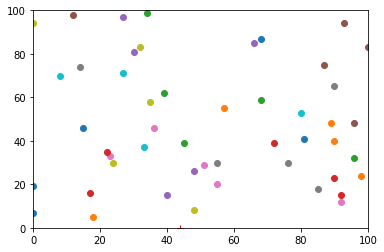

In [272]:
import matplotlib.pyplot as plt
import sys
import random 
N = 50  #平面点的个数
points = []
for i in range(N):
    x = random.randint(0, 100)
    y = random.randint(0, 100)
    points.append([x,y])
x = sys.maxsize
y = sys.maxsize
index = 0
for i in range(len(points)):
    if  points[i][1] < y:
        y = points[i][1]
        index = i 
    if  points[i] == y and points[i][0] < x:
        x = points[i][0]
        index = i 
p_0 = points[index]
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(p_0[0], p_0[1], 'r+')
for p in points:
    if p[0] != p_0[0] and p[1] != p_0[1]:
        plt.plot(p[0], p[1], 'o')  #将点绘制出来

In [273]:
def  compare_polar_angle(p1, p2): #根据点p0比较不同点的极坐标角       
    cp = cross_product([p_0, p1], [p_0, p2])
    if cp < 0: #如果p0p1形成的角度大，那么p0p1Xp0p2一定是负数
        return 1
    if cp > 0:
        return -1
    if cp == 0:  #如果角度一样,离p_0越远就越大
        return  abs(p1[0] - p_0[x]) >= abs(p2[0] - p_0[0])

In [274]:
def  graham_scan(points):
    points.sort(key=functools.cmp_to_key(compare_polar_angle))
    S = []  #空堆栈
    S.append(p_0)
    S.append(points[0])
    S.append(points[1])
    for i in range(2, len(points)): #需要判断第3点与堆栈顶部两点形成线段是否有右拐弯
        p_1 = S[-1]
        p_2 = S[-2]
        cp = cross_product([p_2, p_1], [p_2, points[i]]) #右拐弯的特征是p2p1顺时针转向p2p
        while cp < 0:  #只要有右拐就一直弹出堆栈顶部的点
            S.pop()  
            p_1 = S[-1]
            p_2 = S[-2]
            cp = cross_product([p_2, p_1], [p_2, points[i]])
        S.append(points[i])  
    return  S #突壳端点以逆时针方式存储在S中

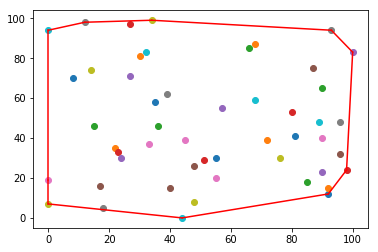

In [275]:
points.remove(p_0)
convex_hull = graham_scan(points)
convex_hull.append(p_0)
points.append(p_0)
for p in points:
    plt.plot(p[0], p[1], 'o')
p = convex_hull[0] #绘制边界线
for i in range(1, len(convex_hull)): 
    plt.plot([p[0], convex_hull[i][0]], [p[1], convex_hull[i][1]], 'r-')
    p = convex_hull[i]
plt.plot([convex_hull[0][0], p_0[0]], [convex_hull[0][1], p_0[1]], 'r-')
plt.show()

In [276]:
print(convex_hull)

[[44, 0], [92, 12], [98, 24], [100, 83], [93, 94], [34, 99], [12, 98], [0, 94], [0, 19], [0, 7], [44, 0]]


In [277]:
def  brute_force_hull(points):
    S = []
    for i in range(0, len(points)): #随便抽取两个节点看他们的连线是否形成突壳的一条边
        for j in range(i+1, len(points)):
            negative_count = 0
            positive_count = 0
            zero_count = 0
            a = (points[j][1] - points[i][1])
            b = (points[i][0] - points[j][0])
            c = (points[i][0]* points[j][1]) - (points[i][1] * points[j][0])
            for k in range(0, len(points)):  #把k点x坐标带入i,j两点形成的方程计算出y值，如果k点y坐标小于计算的y值那么边ij就包围点k
                #if k != i and k != j:
                y = a * points[k][0] + b * points[k][1] - c
                if y  < 0:
                    negative_count += 1
                elif y  > 0:
                    positive_count += 1
                else:
                    zero_count += 1
            if  zero_count + positive_count >= len(points)  or zero_count + negative_count >= len(points) :
                if  [points[i], points[j]] not in S:
                    S.append([points[i], points[j]])
                if [points[j], points[i]]  not in S:
                    S.append([points[j], points[i]])
    return S

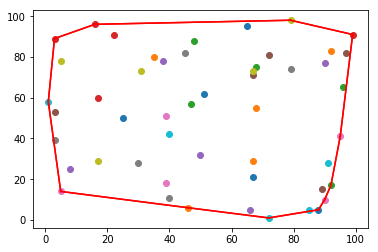

In [278]:
points = []
for i in range(N):
    x = random.randint(0, 100)
    y = random.randint(0, 100)
    points.append([x,y])
convex_hull = brute_force_hull(points)
for p in points:
    plt.plot(p[0], p[1], 'o') 
for i in range(0, len(convex_hull)): 
    p1 = convex_hull[i][0]
    p2 = convex_hull[i][1]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-')
    p = convex_hull[i]
plt.show()

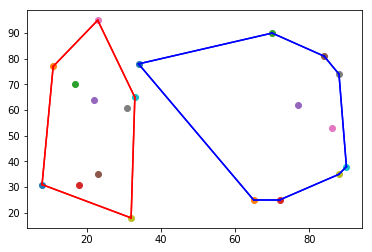

In [297]:
N = 20  #平面点的个数
points = []
for i in range(N):
    x = random.randint(0, 100)
    y = random.randint(0, 100)
    points.append([x,y])
import  sys 
#先将点集按照x坐标排序
points.sort(key = lambda x: x[0])
def  divide_conquer_convex_hull(points):
    if  len(points) <= 10:
        return  brute_force_hull(points)
    middle = int(len(points) / 2)
    left_part = points[0: middle]
    right_part = points[middle :]
    left_hull = divide_conquer_convex_hull(left_part)
    right_hull = divide_conquer_convex_hull(right_part)
    return left_hull, right_hull       
left, right = divide_conquer_convex_hull(points)
for p in points:
    plt.plot(p[0], p[1], 'o') 
for i in range(0, len(left)): 
    p1 = left[i][0]
    p2 = left[i][1]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-')
    p = left[i]
for i in range(0, len(right)): 
    p1 = right[i][0]
    p2 = right[i][1]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b-')
    p = right[i]

In [303]:
def  get_point_point_map_from_hull(hull):
    point_edge = {}  #从突壳边中获取节点相邻对应关系d
    for line in hull:
        for  p in line:
            for q in line:
                if q != p:
                    if (p[0], p[1]) not in point_edge:
                        point_edge[(p[0], p[1])] = []
                    if (q[0], q[1]) not in point_edge[(p[0], p[1])]:
                        point_edge[(p[0], p[1])].append((q[0], q[1]))
    return point_edge
def  find_up_tangent(left_hull, right_hull):
    left_point_edge = get_point_point_map_from_hull(left_hull)
    right_point_edge = get_point_point_map_from_hull(right_hull)
    lp_x = -sys.maxsize - 1
    l = None 
    for line in left_hull:  #找到左边壳的最右节点
        for p in line:
            if p[0] > lp_x:
                lp_x = p[0]
                l = p
    rp_x = sys.maxsize 
    r = None
    for line in right_hull:  #找到右边壳最左节点
        for p in line:
            if p[0] < rp_x:
                rp_x = p[0]
                r = p 
    r_next = r 
    l_next = l 
    while True:
        #从节点r引出的边中找到下一点r_next，使得[l,r]与[l,r_next]形成逆时针旋转
        points  = right_point_edge[(r[0], r[1])]
        find_r_next = False
        for p in points:
            cp = cross_product([l, r_next], [l, p])
            if p != r and cross_product([l, r_next], [l, p]) >= 0 : 
                r_next = [p[0], p[1]] 
                find_r_next = True 
        r = r_next
        #plt.plot([l[0], r_next[0]], [l[1], r_next[1]], 'b-')  调试代码时开启
        #节点l引出的边中找出下一点l_next,使得[r_next, l]与[r_next, l_next]形成顺时针旋转:
        points = left_point_edge[(l[0], l[1])]
        find_l_next = False
        for p in points:
            cp = cross_product([r_next, l_next], [r_next, p])
            if p != l and cross_product([r_next, l_next], [r_next, p]) <= 0:  
                l_next = [p[0], p[1]] 
                find_l_next = True 
        l = l_next
        #plt.plot([l[0], r_next[0]], [l[1], r_next[1]], 'b-')  调试代码时开启
        if find_l_next is False and find_r_next is False:
            return [l, r] #找到了上切线d
def  find_bottom_tangent(left_hull, right_hull):
    left_point_edge = get_point_point_map_from_hull(left_hull)
    right_point_edge = get_point_point_map_from_hull(right_hull)
    lp_x = -sys.maxsize - 1
    l = None 
    for line in left_hull:  #找到左边壳的最右节点
        for p in line:
            if p[0] > lp_x:
                lp_x = p[0]
                l = p
    rp_x = sys.maxsize 
    r = None
    for line in right_hull:  #找到右边壳最左节点
        for p in line:
            if p[0] < rp_x:
                rp_x = p[0]
                r = p 
    r_next = r 
    l_next = l 
    while True:
        #从节点r引出的边中找到下一点r_next，使得[l,r]与[l,r_next]形成顺时针旋转
        points  = right_point_edge[(r[0], r[1])] 
        find_r_next = False
        for p in points:
            if p != r and cross_product([l, r_next], [l, p]) <= 0 :
                r_next = [p[0], p[1]] 
                find_r_next = True
        #plt.plot([l[0], r_next[0]], [l[1], r_next[1]], 'b-')  调试代码时开启
        r = r_next
        #节点l引出的边中找出下一点l_next,使得[r_next, l]与[r_next, l_next]形成顺时针旋转:
        points = left_point_edge[(l[0], l[1])]
        find_l_next = False
        for p in points:
            if p != l and cross_product([r_next, l_next], [r_next, p]) >= 0 :  
                l_next = [p[0], p[1]] 
                find_l_next = True 
        l = l_next 
        #plt.plot([l_next[0], r_next[0]], [l_next[1], r_next[1]], 'b-')  调试代码时开启
        if find_l_next is False and find_r_next is False:
            return [l, r]  #找到了上切线d

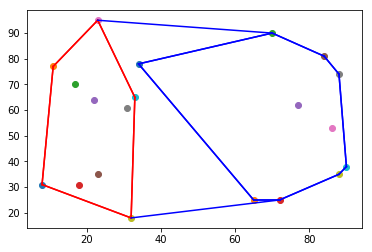

In [304]:
up_tangent = find_up_tangent(left, right)
down_tangent = find_bottom_tangent(left, right)
for p in points:
    plt.plot(p[0], p[1], 'o') 
for i in range(0, len(left)): 
    p1 = left[i][0]
    p2 = left[i][1]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-')
    p = left[i]
for i in range(0, len(right)): 
    p1 = right[i][0]
    p2 = right[i][1]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b-')
    p = right[i]
plt.plot([up_tangent[0][0], up_tangent[1][0]], [up_tangent[0][1], up_tangent[1][1]], 'b-')
plt.plot([down_tangent[0][0], down_tangent[1][0]], [down_tangent[0][1], down_tangent[1][1]], 'b-')

In [308]:
def  draw_hull(convex_hull):
    for i in range(0, len(convex_hull)): 
        p1 = convex_hull[i][0]
        p2 = convex_hull[i][1]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'g-')
def  divide_conquer_convex_hull(points):
    if  len(points) <= 10:#如果点数量上与10个直接使用暴力查找法获得突壳
        return  brute_force_hull(points)
    middle = int(len(points) / 2)  #将点集分割成两部分
    left_part = points[0: middle]
    right_part = points[middle :]
    left_hull = divide_conquer_convex_hull(left_part)  #获得左边点集突壳
    draw_hull(left_hull)
    right_hull = divide_conquer_convex_hull(right_part)#获得右边点集突壳
    draw_hull(right_hull)  #断点设置处
    up_tangent = find_up_tangent(left_hull, right_hull)
    down_tangent = find_bottom_tangent(left_hull, right_hull)
    
    left_lines_deleted = []
    left_base_line = [up_tangent[0], down_tangent[0]]
    convex_hull = []  #通过去掉左边突壳右边边界和右边突壳左边边界来合并两个突壳
    for l in left_hull: #在左边突壳，根据点位于上切线和下切线左边端点连线的左边还是右边觉得其对应边是否保留
        #断点设置处
        if cross_product(left_base_line, [up_tangent[0], l[0]]) > 0 or \
                           cross_product(left_base_line, [up_tangent[0], l[1]]) > 0:
            left_lines_deleted.append(l)
        if cross_product(left_base_line, [up_tangent[0], l[0]]) < 0 or \
                           cross_product(left_base_line, [up_tangent[0], l[1]]) < 0:
            left_lines_deleted.append(left_base_line)
    for l in left_hull:
        if [l[0],l[1]] in left_lines_deleted or  [l[1],l[0]] in left_lines_deleted:
            plt.plot([l[0][0], l[1][0]], [l[0][1], l[1][1]], 'r-')  #调试作用将要删除的边用红色标明
        else:
            convex_hull.append(l)
    right_base_line = [up_tangent[1], down_tangent[1]]
    right_lines_deleted =[]
    for l in right_hull:
        if cross_product(right_base_line, [up_tangent[1], l[0]]) < 0 or \
        cross_product(right_base_line, [up_tangent[1], l[1]]) < 0:
            right_lines_deleted.append(l)
        if cross_product(right_base_line, [up_tangent[1], l[0]]) > 0 or \
        cross_product(right_base_line, [up_tangent[1], l[1]]) > 0:
            right_lines_deleted.append(right_base_line)
    for l in right_hull:
        if [l[0],l[1]] in right_lines_deleted or [l[1],l[0]] in right_lines_deleted:
            plt.plot([l[0][0], l[1][0]], [l[0][1], l[1][1]], 'r-')
        else:
            convex_hull.append(l)               
    convex_hull.append(up_tangent)
    convex_hull.append(down_tangent)  #断点设置处
    return   convex_hull 

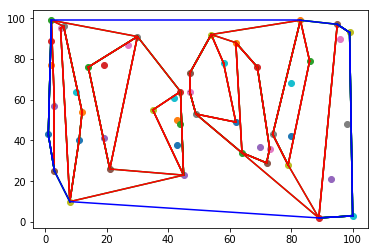

In [309]:
N = 50  #平面点的个数
points = []
for i in range(N):
    x = random.randint(0, 100)
    y = random.randint(0, 100)
    points.append([x,y])
points.sort(key = lambda x : x[0])  #将点按照x坐标排序
for p in points:
    plt.plot(p[0], p[1], 'o') 
convex_hull = divide_conquer_convex_hull(points)
for i in range(0, len(convex_hull)):  #将合并后突壳用蓝色边绘制出来
    p1 = convex_hull[i][0]
    p2 = convex_hull[i][1]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b-')
    p = convex_hull[i]